In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import math
import matplotlib

# Load the data
mlr_data = pd.read_csv('/Users/jjy/Desktop/MLR Data/mlr_data.csv')

# Display the first few rows to understand the structure
print(mlr_data.head())



  well_id replicate_number assay_type assay_number treatment_1  \
0     A04               R1    CD8 MLR        MLR63     GEN1056   
1     A04               R1    CD8 MLR        MLR63     GEN1056   
2     A04               R1    CD8 MLR        MLR63     GEN1056   
3     A04               R1    CD8 MLR        MLR63     GEN1056   
4     A04               R1    CD8 MLR        MLR63     GEN1056   

   concentration_1 treatment_2  concentration_2 donor_1_type  \
0            100.0     GEN1053             30.0     DC Donor   
1            100.0     GEN1053             30.0     DC Donor   
2            100.0     GEN1053             30.0     DC Donor   
3            100.0     GEN1053             30.0     DC Donor   
4            100.0     GEN1053             30.0     DC Donor   

          donor_1_id  donor_2_type         donor_2_id scientist   analyte  \
0  LS112418861 58355  T cell Donor  LS1170885 CC00481      NACH     IL-10   
1  LS112418861 58355  T cell Donor  LS1170885 CC00481      NACH 

/var/folders/wx/_sxsvv513r3fmy2qd036wn500000gn/T/ipykernel_60783/3697649020.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mlr_data[treatment_col], shade=True)


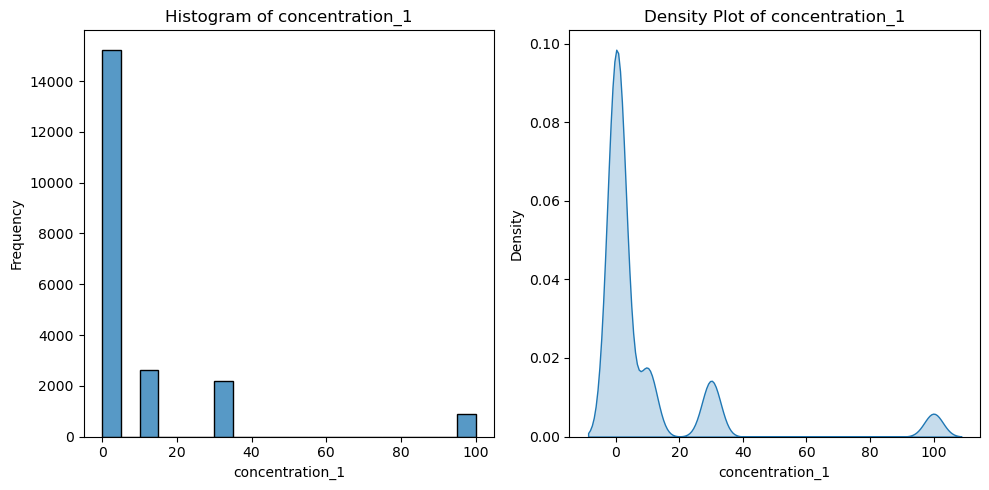

/var/folders/wx/_sxsvv513r3fmy2qd036wn500000gn/T/ipykernel_60783/3697649020.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mlr_data[treatment_col], shade=True)


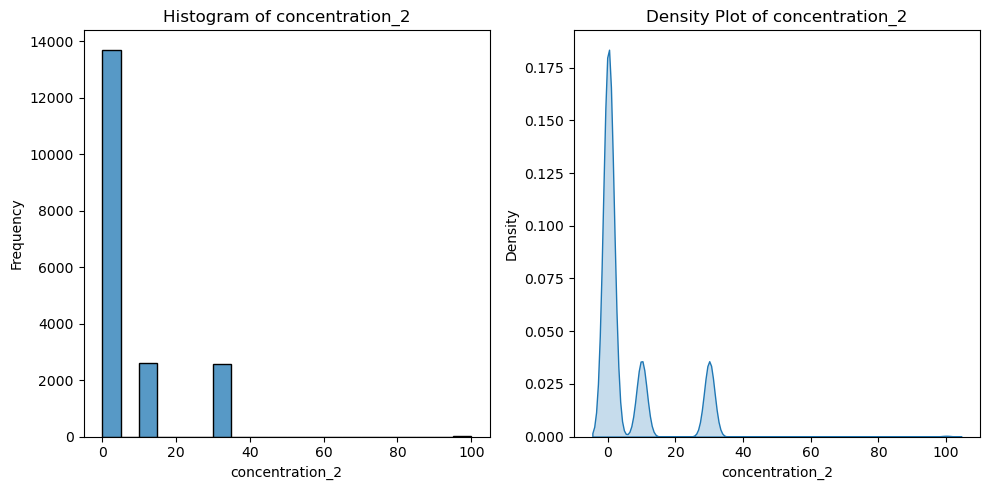

In [7]:
# Assuming the data has columns for treatments and cytokines, replace these column names with actual ones
treatment1_col = 'concentration_1'
treatment2_col = 'concentration_2'

for treatment_col in [treatment1_col, treatment2_col]:
    plt.figure(figsize=(10, 5))
    
    # Histogram plot
    plt.subplot(1, 2, 1)
    sns.histplot(mlr_data[treatment_col], kde=False, bins=20)
    plt.title(f'Histogram of {treatment_col}')
    plt.xlabel(treatment_col)
    plt.ylabel('Frequency')

    # Density plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(mlr_data[treatment_col], shade=True)
    plt.title(f'Density Plot of {treatment_col}')
    plt.xlabel(treatment_col)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

In [9]:
# Loop through each unique analyte and plot, skipping if insufficient data
unique_analytes = mlr_data['analyte'].unique()

In [11]:
"""
Part of this code is adapted from https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py
"""

def plot_1d(treatment, analyte):
    # data_1 = mlr_data.loc[ (mlr_data["treatment_1"]==treatment) &
    #                     (mlr_data["concentration_2"]==0) &
    #                     (mlr_data["analyte"]==analyte) &
    #                     (mlr_data["donor_1_id"]=="LS 24 18861 58355") &
    #                     (mlr_data["donor_2_id"]=="LS 11 71012 CC00481")
    #                     ]
    # data_2 = mlr_data.loc[ ((mlr_data["treatment_2"]==treatment) &
    #                     (mlr_data["concentration_1"]==0)) & 
    #                     (mlr_data["analyte"]==analyte) &
    #                     (mlr_data["donor_1_id"]=="LS 24 18861 58355") &
    #                     (mlr_data["donor_2_id"]=="LS 11 71012 CC00481")
    #                     ]
    data_1 = mlr_data.loc[ (mlr_data["treatment_1"]==treatment) &
                        (mlr_data["concentration_2"]==0) &
                        (mlr_data["analyte"]==analyte)
                        ]
    data_2 = mlr_data.loc[ ((mlr_data["treatment_2"]==treatment) &
                        (mlr_data["concentration_1"]==0)) & 
                        (mlr_data["analyte"]==analyte)
                        ]
    if data_1.empty & data_2.empty:
        return
    
    if data_1.empty:
        X = data_2.copy()["concentration_2"]
        y = data_2.copy()["analyte_value"]
        
    else:
        X = data_1.copy()["concentration_1"]
        y = data_1.copy()["analyte_value"]
    print()
    corr = np.corrcoef(X,y)[0][1]
    if  corr < 0.5:
        return
    fig, ax = plt.subplots()
    ax.scatter(X, y)
    ax.set_title("Treatment: " + str(treatment) + "   Analyte: " + str(analyte)+"    Correlation: " + str(corr))
    plt.show()

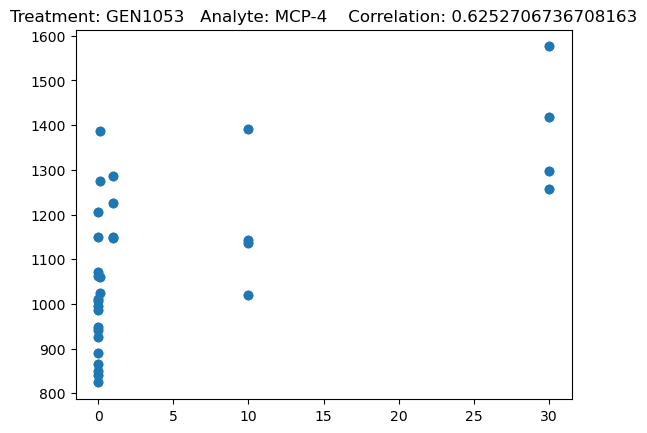

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


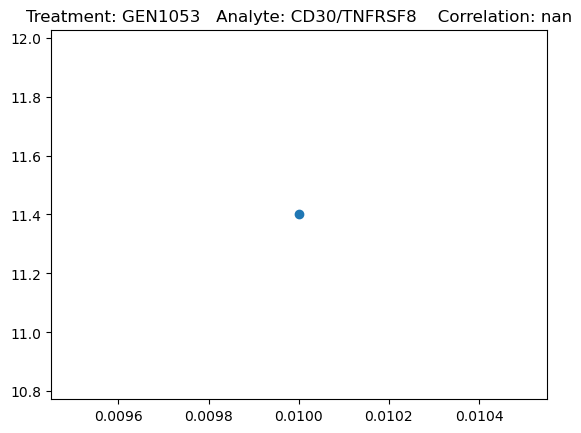

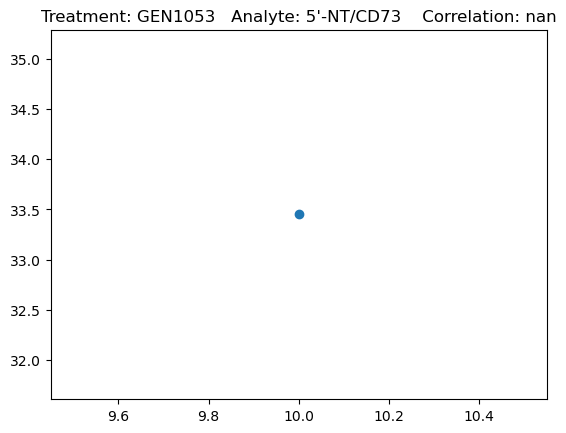

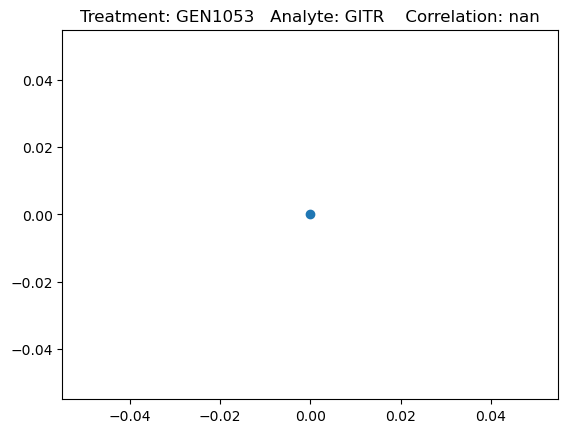

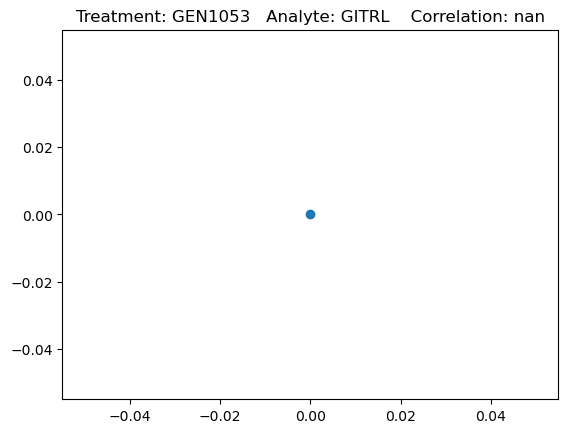

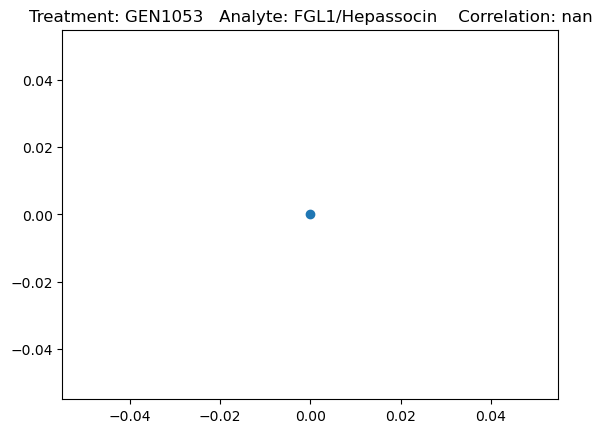

In [15]:
for analyte in unique_analytes:
    #plot_1d("Pembrolizumab",analyte)
    plot_1d("GEN1053",analyte)

In [587]:
"""
Method of computation gotten and adapted from 
Taketa, K., & Pogell, B. M. (1965). Allosteric inhibition of rat liver fructose 1, 6-diphosphatase by adenosine 5'-monophosphate. Journal of Biological Chemistry, 240(2), 651-662.
Altszyler, E., Ventura, A. C., Colman-Lerner, A., & Chernomoretz, A. (2017). Ultrasensitivity in signaling cascades revisited: Linking local and global ultrasensitivity estimations. PloS one, 12(6), e0180083. https://doi.org/10.1371/journal.pone.0180083
Inspiration of designing this method is also from Rob Mulla on https://www.youtube.com/watch?v=QpzMWQvxXWk
"""
# Method to see if we can compute the Hill coefficient
def Hill_coef_computable(data,X,y):
    y_max = data[y].max()
    y_min = data[y].min()
    y_range = y_max - y_min
    X_max = data.loc[(data[y]>0.9 * y_range + y_min) & (data[y]< y_max), X]
    X_min = data.loc[(data[y]<0.1 * y_range + y_min) & (data[y]> y_min), X]
    if X_max.size == 0:
        return False
    if X_min.size == 0:
        return False
    return True


In [588]:
"""
Method of computation gotten and adapted from 
Taketa, K., & Pogell, B. M. (1965). Allosteric inhibition of rat liver fructose 1, 6-diphosphatase by adenosine 5'-monophosphate. Journal of Biological Chemistry, 240(2), 651-662.
Altszyler, E., Ventura, A. C., Colman-Lerner, A., & Chernomoretz, A. (2017). Ultrasensitivity in signaling cascades revisited: Linking local and global ultrasensitivity estimations. PloS one, 12(6), e0180083. https://doi.org/10.1371/journal.pone.0180083
"""
# Method to compute the hill coefficient
def Hill_coef(data,X,y):
    y_max = data[y].max()
    y_min = data[y].min()
    y_range = y_max - y_min
    X_90 = data.loc[data[y]>0.9 * y_range + y_min, X].min()
    X_10 = data.loc[data[y]<0.1 * y_range + y_min, X].max()
    quotient = X_90/X_10
    coef = math.log10(81)/math.log10(quotient)
    return coef

In [589]:
# data = mlr_data.loc[
#         (mlr_data["treatment_1"] == "GEN1056") & 
#         (mlr_data["treatment_2"] == "GEN1053") & 
#         (mlr_data["analyte"] == "IL-10"), 
#         ["concentration_1", "concentration_2", "analyte_value"]
#     ]
# data_1 = data.loc[data["concentration_2"]==0]
# # print(data_1)
# print(Hill_coef(data_1,"concentration_1","analyte_value"))
# Hill_coef_computable(data_1,"concentration_1","analyte_value")

In [590]:
"""
The design of this method is inspired by Rob Mulla on https://www.youtube.com/watch?v=QpzMWQvxXWk
"""
def plotable(treatment_1, treatment_2, analyte):
    data = mlr_data.loc[
        (mlr_data["treatment_1"] == treatment_1) & 
        (mlr_data["treatment_2"] == treatment_2) & 
        (mlr_data["analyte"] == analyte), 
        ["concentration_1", "concentration_2", "analyte_value"]
    ]
    data_2 = data.loc[data["concentration_1"]==0]
    data_1 = data.loc[data["concentration_2"]==0]
    # Check if the data has less than 30 samples
    if data.size<30:
        return False
    return True


In [591]:
"""
Part of code in this mehtod is adapted from https://matplotlib.org/stable/plot_types/3D/scatter3d_simple.html#sphx-glr-plot-types-3d-scatter3d-simple-py
and helped by other examples from the official website of matplotlib: https://matplotlib.org/stable/
"""
def plot(treatment_1, treatment_2, analyte):
    data = mlr_data.loc[
        (mlr_data["treatment_1"] == treatment_1) & 
        (mlr_data["treatment_2"] == treatment_2) & 
        (mlr_data["analyte"] == analyte), 
        ["concentration_1", "concentration_2", "analyte_value"]
    ]
    
    # Check if the data is empty
    if not plotable(treatment_1, treatment_2, analyte):
        print(f"Skipping {analyte} due to insufficient data.")
        return 
    
    xs = data["concentration_1"].values
    ys = data["concentration_2"].values
    zs = data["analyte_value"].values
    X = data[["concentration_1", "concentration_2"]]
    y = zs

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(data[["concentration_1", "concentration_2"]], zs)

    # Create a grid for plotting the regression plane
    x_pred = np.linspace(xs.min(), xs.max(), 30)
    y_pred = np.linspace(ys.min(), ys.max(), 30)
    x_pred, y_pred = np.meshgrid(x_pred, y_pred)
    z_pred = model.predict(np.c_[x_pred.ravel(), y_pred.ravel()]).reshape(x_pred.shape)
    
    # Compute the mean of cross validation results of mean absolute error
    cross_val_error = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error").mean()

    # Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, color='blue', label='Data points')
    ax.plot_surface(x_pred, y_pred, z_pred, color='red', alpha=0.5, rstride=100, cstride=100)
    
    # Adding contour plot
    contour = ax.contourf(x_pred, y_pred, z_pred, zdir='z', offset=zs.min(), cmap='viridis', alpha=0.5)
    fig.colorbar(contour, ax=ax, shrink=0.5, aspect=5)
    
    ax.set_xlabel(treatment_1 + " concentration")
    ax.set_ylabel(treatment_2 + " concentration")
    ax.set_zlabel(analyte + " value")
    ax.set_title(f"3D Surface Plot with Regression Plane and Contours for {analyte}" " Error: " + str(cross_val_error))
    ax.legend()
    plt.show()
    return cross_val_error

In [592]:
"""
Helped by 
https://www.youtube.com/watch?v=3CCkeFShB3U
https://www.youtube.com/watch?v=kE_I-5rxtEA&t=164s
"""
def cross_val_mae(treatment_1, treatment_2, analyte, dimension=1):
    data = mlr_data.loc[
        (mlr_data["treatment_1"] == treatment_1) & 
        (mlr_data["treatment_2"] == treatment_2) & 
        (mlr_data["analyte"] == analyte), 
        ["concentration_1", "concentration_2", "analyte_value"]
    ]
    
    # Check if the data is empty
    if not plotable(treatment_1, treatment_2, analyte):
        return 
    
    X = data[["concentration_1", "concentration_2"]]
    y = data["analyte_value"].values
    if dimension == "interactive":
        X["interaction"] = X["concentration_1"].mul(X["concentration_2"])
    else:
        polynomial = PolynomialFeatures(dimension)
        X = polynomial.fit_transform(X)
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Compute the mean of cross validation results of mean absolute error
    cross_val_error = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error").mean()
    cross_val_error = cross_val_error/y.mean()
    return cross_val_error
    

In [593]:
# cross_val_mae("GEN1056","GEN1053","IL-10","interactive")

In [594]:
"""
Part of code in this mehtod is adapted from https://matplotlib.org/stable/plot_types/3D/scatter3d_simple.html#sphx-glr-plot-types-3d-scatter3d-simple-py
and helped by other examples from the official website of matplotlib: https://matplotlib.org/stable/
Helped by 
https://www.youtube.com/watch?v=3CCkeFShB3U
https://www.youtube.com/watch?v=kE_I-5rxtEA&t=164s
"""
def poly_plot(treatment_1, treatment_2, analyte, dimension):
    data = mlr_data.loc[
        (mlr_data["treatment_1"] == treatment_1) & 
        (mlr_data["treatment_2"] == treatment_2) & 
        (mlr_data["analyte"] == analyte), 
        ["concentration_1", "concentration_2", "analyte_value"]
    ]
    
    # Check if the data is empty
    if not plotable(treatment_1, treatment_2, analyte):
        print(f"Skipping {analyte} due to insufficient data.")
        return 
    
    xs = data["concentration_1"].values
    ys = data["concentration_2"].values
    zs = data["analyte_value"].values
    X = data[["concentration_1", "concentration_2"]]
    if dimension == "interactive":
        X["interaction"] = X["concentration_1"].mul(X["concentration_2"])
    else:
        polynomial = PolynomialFeatures(dimension)
        X = polynomial.fit_transform(X)
    y = zs

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(data[["concentration_1", "concentration_2"]], zs)

    # Create a grid for plotting the regression plane
    x_pred = np.linspace(xs.min(), xs.max(), 30)
    y_pred = np.linspace(ys.min(), ys.max(), 30)
    x_pred, y_pred = np.meshgrid(x_pred, y_pred)
    z_pred = model.predict(np.c_[x_pred.ravel(), y_pred.ravel()]).reshape(x_pred.shape)
    
    # Compute the mean of cross validation results of mean absolute error
    cross_val_error = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error").mean()/y.mean()

    # Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, color='blue', label='Data points')
    ax.plot_surface(x_pred, y_pred, z_pred, color='red', alpha=0.5, rstride=100, cstride=100)
    
    # Adding contour plot
    contour = ax.contourf(x_pred, y_pred, z_pred, zdir='z', offset=zs.min(), cmap='viridis', alpha=0.5)
    fig.colorbar(contour, ax=ax, shrink=0.5, aspect=5)
    
    ax.set_xlabel(treatment_1 + " concentration")
    ax.set_ylabel(treatment_2 + " concentration")
    ax.set_zlabel(analyte + " value")
    ax.set_title(f"3D Surface Plot with Regression Plane and Contours for {analyte}" " Error: " + str(cross_val_error))
    ax.legend()
    plt.show()
    return cross_val_error

In [595]:
GEN1056_GEN1053_error_table = {}
analytes = []
errors = [[],[],[],[]]
for dimension in range (1,4):
    for analyte in unique_analytes:
        if plotable("GEN1056", "GEN1053", analyte):
            # plot("GEN1056", "GEN1053", analyte)
            if analyte not in analytes:
                analytes.append(analyte)
            errors[dimension-1].append(float(cross_val_mae("GEN1056", "GEN1053", analyte, dimension=dimension)))
    GEN1056_GEN1053_error_table["dimension "+str(dimension)+" error"] = errors[dimension-1]
for analyte in unique_analytes:
    if plotable("GEN1056", "GEN1053", analyte):
        # plot("GEN1053", "Pembrolizumab", analyte)
        errors[3].append(float(cross_val_mae("GEN1056", "GEN1053", analyte, dimension="interactive")))
GEN1056_GEN1053_error_table["interaction error"]=errors[3]
GEN1056_GEN1053_error_table["analyte"]=analytes
GEN1056_GEN1053_error_table = pd.DataFrame(GEN1056_GEN1053_error_table)
GEN1056_GEN1053_error_table["minimum"]=GEN1056_GEN1053_error_table[["dimension 1 error","dimension 2 error", "dimension 3 error", "interaction error"]].min(axis=1)
GEN1056_GEN1053_error_table["minimum_id"]=GEN1056_GEN1053_error_table[["dimension 1 error","dimension 2 error", "dimension 3 error", "interaction error"]].idxmin(axis=1)

In [596]:
GEN1053_Pembrolizumab_error_table = {}
analytes = []
errors = [[],[],[],[]]
for dimension in range (1,4):
    for analyte in unique_analytes:
        if plotable("GEN1053", "Pembrolizumab", analyte):
            # plot("GEN1053", "Pembrolizumab", analyte)
            if analyte not in analytes:
                analytes.append(analyte)
            errors[dimension-1].append(float(cross_val_mae("GEN1053", "Pembrolizumab", analyte, dimension=dimension)))
    GEN1053_Pembrolizumab_error_table["dimension "+str(dimension)+" error"] = errors[dimension-1]
for analyte in unique_analytes:
    if plotable("GEN1053", "Pembrolizumab", analyte):
        # plot("GEN1053", "Pembrolizumab", analyte)
        errors[3].append(float(cross_val_mae("GEN1053", "Pembrolizumab", analyte, dimension="interactive")))
GEN1053_Pembrolizumab_error_table["interaction error"]=errors[3]
GEN1053_Pembrolizumab_error_table["analyte"]=analytes
GEN1053_Pembrolizumab_error_table = pd.DataFrame(GEN1053_Pembrolizumab_error_table)
GEN1053_Pembrolizumab_error_table["minimum"]=GEN1053_Pembrolizumab_error_table[["dimension 1 error","dimension 2 error", "dimension 3 error", "interaction error"]].min(axis=1)
GEN1053_Pembrolizumab_error_table["minimum_id"]=GEN1053_Pembrolizumab_error_table[["dimension 1 error","dimension 2 error", "dimension 3 error", "interaction error"]].idxmin(axis=1)

In [597]:
GEN1056_GEN1053_error_table = GEN1056_GEN1053_error_table.sort_values(by=['minimum'])
GEN1053_Pembrolizumab_error_table = GEN1053_Pembrolizumab_error_table.sort_values(by=['minimum'])

In [598]:
print(GEN1056_GEN1053_error_table)

    dimension 1 error  dimension 2 error  dimension 3 error  \
25           0.061743           0.062763           0.060819   
3            0.117827           0.109096           0.093081   
24           0.093915           0.095057           0.096652   
22           0.114418           0.117109           0.120299   
23           0.132897           0.132690           0.127475   
12           0.151168           0.145217           0.145025   
26           0.146420           0.149483           0.153947   
7            0.151080           0.156267           0.160269   
20           0.268892           0.238100           0.177972   
11           0.190784           0.181901           0.178402   
19           0.217691           0.209584           0.194066   
14           0.354563           0.291709           0.228095   
10           0.336308           0.283482           0.235945   
0            0.345477           0.333371           0.294761   
4            0.425704           0.363999           0.29

In [599]:
print(GEN1053_Pembrolizumab_error_table)

    dimension 1 error  dimension 2 error  dimension 3 error  \
44           0.104317           0.108638           0.113733   
59           0.108050           0.167119           9.246610   
60           0.179169           0.189119           0.542893   
50           0.183146           0.188978           0.201880   
14           0.202433           0.206722           0.208898   
..                ...                ...                ...   
24           1.054591           1.097501           1.183884   
53           1.076145           1.055030           1.094634   
46           1.091459           1.132119           1.228636   
16           1.142061           1.184961           1.279339   
3            1.168746           1.203270           1.298999   

    interaction error       analyte   minimum         minimum_id  
44           0.104383    Galectin-3  0.104317  dimension 1 error  
59           0.108064  CD226/DNAM-1  0.108050  dimension 1 error  
60           0.188926          CD28  0.179